In [1]:
import pandas as pd

C:\Users\Dell\AppData\Local\Temp\ipykernel_17112\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
df =pd.read_csv("Social_Network_Ads.csv")

In [7]:
df =df.dropna()

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [12]:
df.duplicated().sum()

33

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[367 rows x 3 columns]>

In [16]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size= 0.2)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
pred = model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

In [22]:
accuracy_score(y_test, pred)

0.8243243243243243

In [23]:
precision_score(y_test,pred)

0.8214285714285714

In [24]:
recall_score(y_test, pred)

0.7419354838709677

In [25]:
con = confusion_matrix(y_test, pred, labels=[0,1])

In [26]:
TP = con[1][1]
FP = con[0][1]
TN = con[0][0]
FN = con[1][0]

In [31]:
error_rate = (FP + FN)/ (FP+FN+TN+TP)

In [32]:
print(error_rate)

0.17567567567567569


<Axes: >

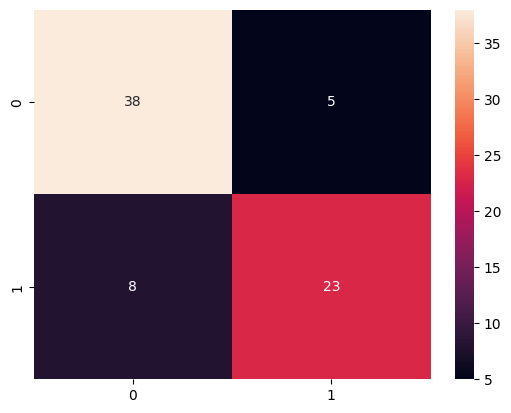

In [33]:
sns.heatmap(con, annot = True)